In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

file_count = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    file_count += len(filenames)

print(f"Total files in /kaggle/input: {file_count}")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Total files in /kaggle/input: 3264


Step 1: Data Loading and Preprocessing

In [11]:
# 📦 Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# 🧠 Define the dataset path
dataset_dir = "../input/brain-tumor-classification-mri/"

# 👁 Define image size for resizing
IMG_SIZE = 128

# 🏷️ Mapping original labels to binary labels
label_map = {
    "glioma_tumor": "Tumor",
    "meningioma_tumor": "Tumor",
    "pituitary_tumor": "Tumor",
    "no_tumor": "No Tumor"
}

# 📥 Function to load images
def load_images_from_folder(folder_path):
    data = []
    for label_folder in os.listdir(folder_path):
        label_name = label_map[label_folder]
        folder = os.path.join(folder_path, label_folder)
        for filename in tqdm(os.listdir(folder), desc=f"Loading {label_folder}"):
            img_path = os.path.join(folder, filename)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append((img, label_name))
            except:
                pass  # skip corrupted images
    return data

# 🔄 Load images from Training and Testing folders
train_data = load_images_from_folder(os.path.join(dataset_dir, "Training"))
test_data = load_images_from_folder(os.path.join(dataset_dir, "Testing"))

# 🔗 Combine both for a complete dataset
all_data = train_data + test_data

Loading glioma_tumor: 100%|██████████| 100/100 [00:00<00:00, 334.82it/s]


Step 2: Shuffle, Label Encode, Normalize, Split

In [12]:
#for mobilenetv2 use preprocess_input function for better processing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# 🔁 Shuffle the dataset
import random
random.shuffle(all_data)

# 💠 Separate features and labels
X = []
y = []

for img, label in all_data:
    X.append(img)
    y.append(1 if label == "Tumor" else 0) # Binary label: 1=Tumor, 0=No Tumor

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# 🔍 Normalize pixel values (0–1 range)
# X = X / 255.0 

# 📤 Split into Train, Validation, and Test sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train = preprocess_input(X_train.copy())
X_val = preprocess_input(X_val.copy())
X_test = preprocess_input(X_test.copy())

# ✅ Shapes of sets
print("Training:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Training: (2284, 128, 128, 3) (2284,)
Validation: (490, 128, 128, 3) (490,)
Test: (490, 128, 128, 3) (490,)


Step 3: EDA (Exploratory Data Analysis)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


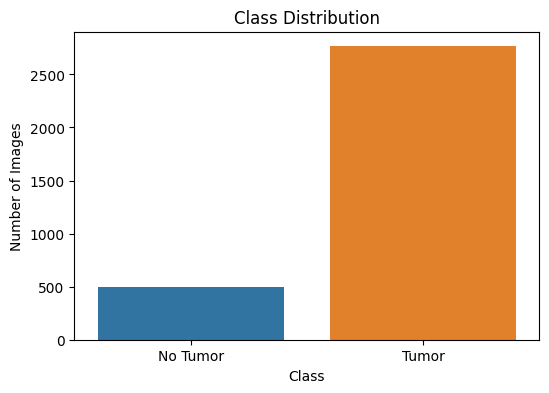

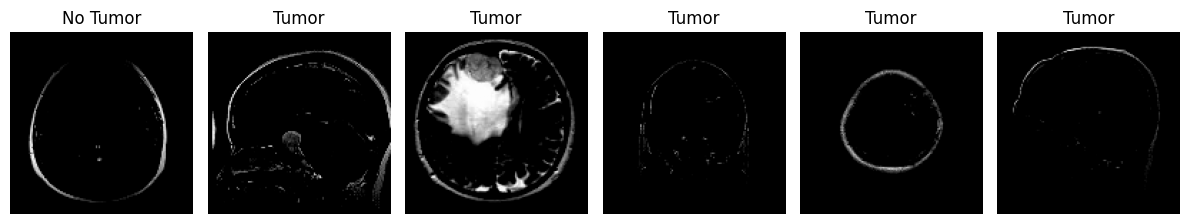

In [14]:
# 🔢 Count of each class
import pandas as pd
label_names = ['No Tumor', 'Tumor']
class_counts = pd.Series(y).value_counts().sort_index()

# 📊 Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=label_names, y=class_counts.values)
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()

# 🖼 Show sample images
def show_samples(X, y, label_names, num=6):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(X[i])
        plt.title(label_names[y[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
show_samples(X_train, y_train, label_names)

Step 4A: Custom CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Custom CNN Model
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  #Binary classification
])

model1.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history1 = model1.fit(X_train, y_train,
                      epochs=20,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stop],
                      batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 631ms/step - accuracy: 0.8526 - loss: 0.4807 - val_accuracy: 0.8469 - val_loss: 0.3749
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 625ms/step - accuracy: 0.9510 - loss: 0.1279 - val_accuracy: 0.8612 - val_loss: 0.3195
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 624ms/step - accuracy: 0.9784 - loss: 0.0573 - val_accuracy: 0.8531 - val_loss: 0.3714
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 620ms/step - accuracy: 0.9832 - loss: 0.0489 - val_accuracy: 0.8980 - val_loss: 0.2128
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 623ms/step - accuracy: 0.9862 - loss: 0.0295 - val_accuracy: 0.9184 - val_loss: 0.2055
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 48s 663ms/step - accuracy: 0.9930 - loss: 0.0236 - val_accuracy: 0.9367 - val_loss: 0.2028
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 45s 627ms/step - accuracy: 0.9955 - loss: 0.0174 - val_accuracy: 0.9327 - val_loss: 0.1979
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 638ms/step - accuracy: 0.9913 - loss: 0.0194 - val_accu

Step 4B: Transfer Learning with MobileNetV2

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_660']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_660']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step


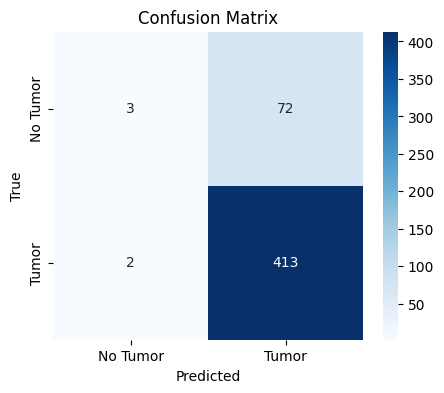

              precision    recall  f1-score   support

    No Tumor       0.60      0.04      0.07        75
       Tumor       0.85      1.00      0.92       415

    accuracy                           0.85       490
   macro avg       0.73      0.52      0.50       490
weighted avg       0.81      0.85      0.79       490



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_probs = best_model.predict(X_test_m)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"]))


Step 5A: Model 1: Custom CNN

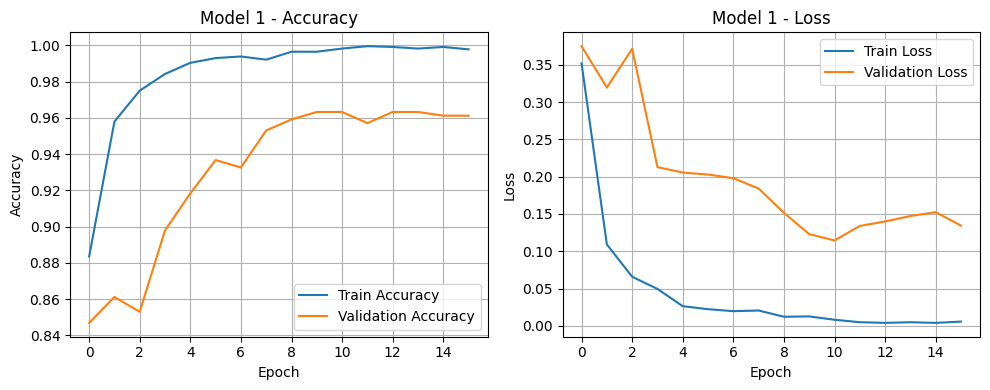

In [21]:
import matplotlib.pyplot as plt

# Accuracy Graph for Model 1
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Graph for Model 1
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model 1 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Step 5B: Model 2: MobileNetV2

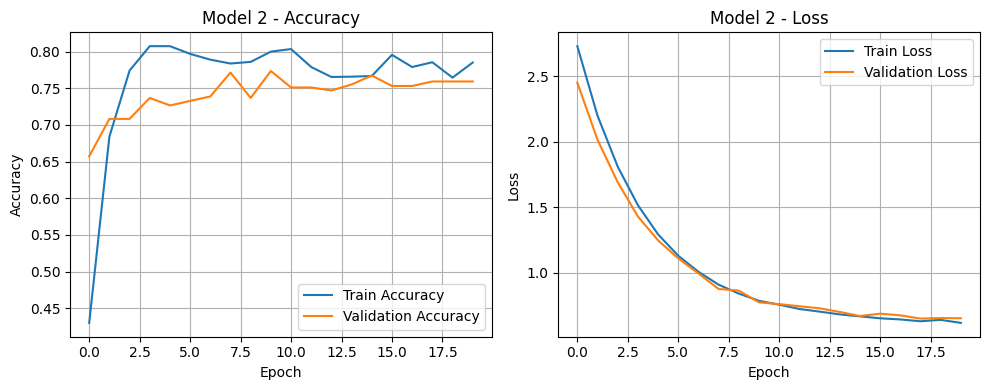

In [23]:
import matplotlib.pyplot as plt

# Step 5B: MobileNetV2 Training & Validation Accuracy and Loss Plot
plt.figure(figsize=(10, 4))  # Same size as Step 5A

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model 2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Step 5C: Compared validation accuracy of both models on a single graph.

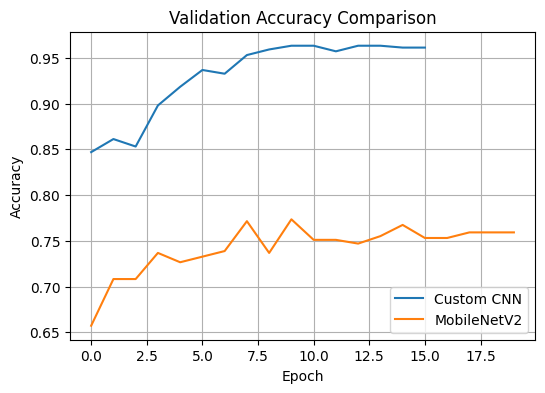

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(history1.history['val_accuracy'], label='Custom CNN')
plt.plot(history2.history['val_accuracy'], label='MobileNetV2')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Step 5D: Confusion Matrix & Classification Report

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_976']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step


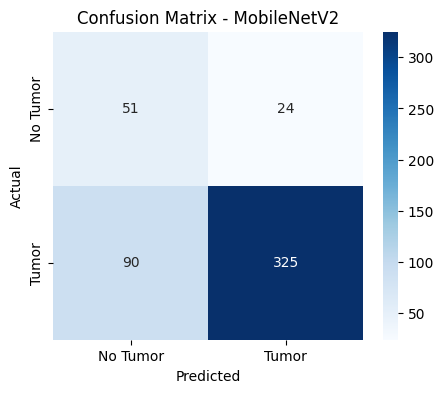

Classification Report - MobileNetV2
              precision    recall  f1-score   support

    No Tumor       0.36      0.68      0.47        75
       Tumor       0.93      0.78      0.85       415

    accuracy                           0.77       490
   macro avg       0.65      0.73      0.66       490
weighted avg       0.84      0.77      0.79       490

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


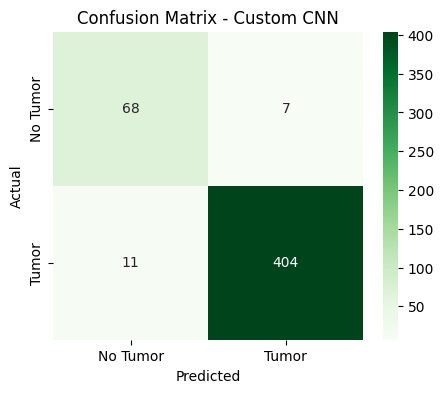

Classification Report - Custom CNN
              precision    recall  f1-score   support

    No Tumor       0.86      0.91      0.88        75
       Tumor       0.98      0.97      0.98       415

    accuracy                           0.96       490
   macro avg       0.92      0.94      0.93       490
weighted avg       0.96      0.96      0.96       490



In [25]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ======== MobileNetV2 Evaluation =========
X_test_m = preprocess_input(X_test.copy())

Y_pred_m2 = model2.predict(X_test_m)
y_pred_m2 = (Y_pred_m2 > 0.5).astype(int).reshape(-1)

cm_m2 = confusion_matrix(y_test, y_pred_m2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_m2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report - MobileNetV2")
print(classification_report(y_test, y_pred_m2, target_names=["No Tumor", "Tumor"]))


# ======== Custom CNN Evaluation =========
Y_pred_cnn = model1.predict(X_test)
y_pred_cnn = (Y_pred_cnn > 0.5).astype(int).reshape(-1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.title("Confusion Matrix - Custom CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Classification Report - Custom CNN")
print(classification_report(y_test, y_pred_cnn, target_names=["No Tumor", "Tumor"]))

Step 6A: Grad-CAM Function

In [28]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grad-CAM function to generate heatmap and overlay on image
def generate_gradcam_overlay(model, img_array, layer_name='block_16_project', alpha=0.4):
    # Create a model that outputs activations of target layer and model predictions
    grad_model = tf.keras.models.Model(
        inputs=model.input, 
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # For binary classification, take output neuron 0

    # Compute gradients of the loss with respect to convolutional layer output
    grads = tape.gradient(loss, conv_outputs)[0]
    conv_outputs = conv_outputs[0]

    # Global average pooling of gradients to obtain importance weights
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Compute weighted sum of feature maps to get the Grad-CAM heatmap
    cam = np.zeros(conv_outputs.shape[0:2], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * conv_outputs[:, :, i]

    # Normalize heatmap to range [0,1]
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (128, 128))
    cam = cam - np.min(cam)
    cam = cam / (np.max(cam) + 1e-8)

    # Convert heatmap to color map and overlay on originalimage
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    img_rgb = cv2.cvtColor(np.uint8(img_array[0] * 255), cv2.COLOR_RGB2BGR)
    overlayed = cv2.addWeighted(img_rgb, 1 - alpha, heatmap_colored, alpha, 0)
    overlayed = cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB)

    return img_array[0], cam, overlayed


Step 6B: Apply Grad-CAM on a Sample Test Image

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_976']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


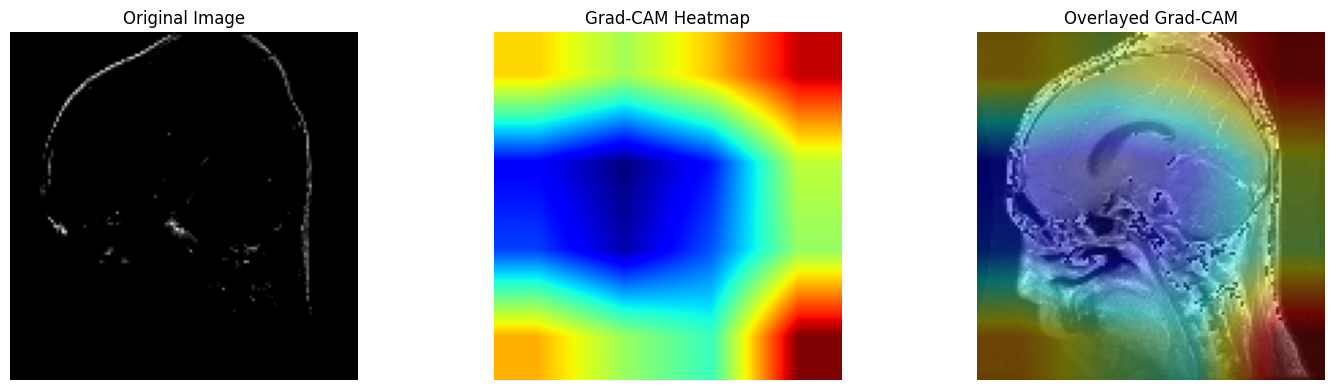

In [30]:
# Select a sample image from the test set
sample_img = X_test[0]

# Expand dimensions to create batch size of 1
sample_input = np.expand_dims(sample_img, axis=0)

# Generate Grad-CAM heatmap and overlay using the correct target layer
original, heatmap, overlay = generate_gradcam_overlay(model2, sample_input, layer_name='block_16_project')

# Plot Original Image, Grad-CAM Heatmap, and Overlayed Image side-by-side
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Grad-CAM Heatmap')
plt.imshow(heatmap, cmap='jet')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Overlayed Grad-CAM')
plt.imshow(overlay)
plt.axis('off')

plt.tight_layout()
plt.show()

Step 7: Model Comparison and Evaluation Summary

In [31]:
# Compare maximum validation accuracy during training
print("Custom CNN Validation Accuracy:", max(history1.history['val_accuracy']))
print("Updated MobileNetV2 Validation Accuracy:", max(history2.history['val_accuracy']))

Custom CNN Validation Accuracy: 0.9632652997970581
Updated MobileNetV2 Validation Accuracy: 0.7734693884849548
